In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trips = pd.read_csv('tp_bike/trip.csv')

In [3]:
trips.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214


In [4]:
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [5]:
#Depuracion de datos
#separo las fechas de las horas
fechaYhora = trips['start_date'].str.split(' ')

In [6]:
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])

In [7]:
trips = trips.assign(date_start = fecha, time_start = hora)

In [8]:
#IDEM pero con la fecha final
fechaYhora = trips['end_date'].str.split(' ')
fecha = fechaYhora.map(lambda x: x[0])
hora = fechaYhora.map(lambda x: x[1])
trips = trips.assign(date_end = fecha, time_end = hora)

In [9]:
#elimino columnas
#del trips['start_date']
#del trips['end_date']

In [10]:
#le cambio el formato a las fechas
import calendar
trips['date_start'] = pd.to_datetime(trips['date_start'])
trips['date_end'] = pd.to_datetime(trips['date_end'])

In [11]:
trips.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date_start,time_start,date_end,time_end
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,14:13,2013-08-29,14:14
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,14:42,2013-08-29,14:43
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,10:16,2013-08-29,10:17


In [12]:
trips['weekday'] = trips['date_start'].map(lambda x: x.weekday_name)

In [13]:
trips['hour'] = pd.to_datetime(trips['time_start'], format = '%H:%M', errors = 'coerce').dt.hour

In [14]:
trips.dtypes

id                             int64
duration                       int64
start_date                    object
start_station_name            object
start_station_id               int64
end_date                      object
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
date_start            datetime64[ns]
time_start                    object
date_end              datetime64[ns]
time_end                      object
weekday                       object
hour                           int64
dtype: object

In [15]:
trips.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date_start,time_start,date_end,time_end,weekday,hour
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,14:13,2013-08-29,14:14,Thursday,14
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,14:42,2013-08-29,14:43,Thursday,14
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,10:16,2013-08-29,10:17,Thursday,10


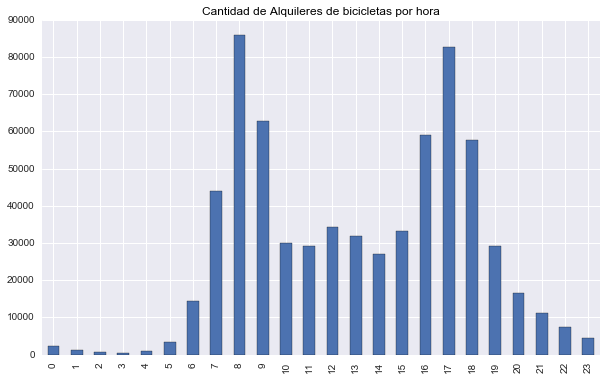

In [16]:
#Pregunta : Plots sobre la Cantidad de alquileres por hora
plt.figure()
plt.title('Cantidad de Alquileres de bicicletas por hora', color = 'black')
trips['hour'].value_counts().sort_index().plot(kind = 'bar', figsize = (10,6));

In [17]:
diasDeSemana = trips['weekday'].value_counts()
diasDeSemana

Tuesday      122259
Wednesday    120201
Thursday     119089
Monday       115873
Friday       109361
Saturday      44785
Sunday        38391
Name: weekday, dtype: int64

In [18]:
#Cambio los dias por su respectivo numero Empieza desde el lunes, lunes = 1
#trips['weekday'].value_counts().reindex([2,3,4,1,5,6,7]) # se usa con rename
# Intento fallido el de arriba xD
diasDeSemana  = diasDeSemana.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
diasDeSemana
#otra forma seria con un rename

Monday       115873
Tuesday      122259
Wednesday    120201
Thursday     119089
Friday       109361
Saturday      44785
Sunday        38391
Name: weekday, dtype: int64

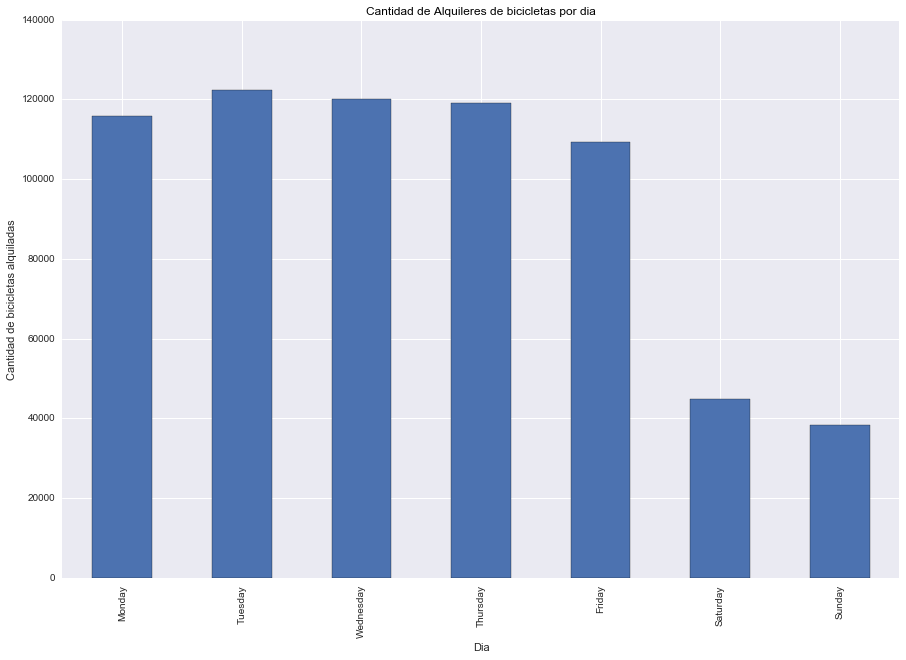

In [19]:
#Pregunta: cantidad de alquileres por dia
plt.figure()
plt.title('Cantidad de Alquileres de bicicletas por dia', color = 'black')
diasDeSemana.plot(kind = 'bar', figsize = (15,10));
plt.ylabel('Cantidad de bicicletas alquiladas')
plt.xlabel('Dia')

In [20]:
#Pregunta: cantidad de alquileres por hora

# Analizo el atributo bike_id

In [21]:
top = trips.loc[:,['bike_id','duration']].groupby('bike_id').agg(['count','mean'])

In [22]:
top_ten = top.sort_values(('duration','count'),ascending=False).reset_index()

In [23]:
top_ten.head(3)
#el bike_id 392 es el que mas viajes tiene

bike_id duration            
             count        mean
0     392     2061  868.256186
1     489     1975  883.958481
2     558     1955  884.573402

In [24]:
trips.loc[trips.bike_id == 392,:].sort_values('duration',ascending=False)[0:5]

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date_start,time_start,date_end,time_end,weekday,hour
341835,879402,47545,8/6/2015 18:46,Market at 10th,67,8/7/2015 7:59,Commercial at Montgomery,45,392,Customer,94133,2015-08-06,18:46,2015-08-07,7:59,Thursday,18
660744,445597,42483,9/10/2014 6:45,San Francisco Caltrain (Townsend at 4th),70,9/10/2014 18:34,San Francisco Caltrain (Townsend at 4th),70,392,Customer,90034,2014-09-10,6:45,2014-09-10,18:34,Wednesday,6
19116,30245,32255,9/22/2013 8:36,Powell Street BART,39,9/22/2013 17:34,Commercial at Montgomery,45,392,Customer,NaN,2013-09-22,8:36,2013-09-22,17:34,Sunday,8
388844,817974,29919,6/23/2015 8:04,San Francisco Caltrain (Townsend at 4th),70,6/23/2015 16:23,San Francisco Caltrain (Townsend at 4th),70,392,Subscriber,94010,2015-06-23,8:04,2015-06-23,16:23,Tuesday,8
567066,577385,29430,12/16/2014 8:51,San Francisco Caltrain 2 (330 Townsend),69,12/16/2014 17:01,Market at Sansome,77,392,Subscriber,94086,2014-12-16,8:51,2014-12-16,17:01,Tuesday,8


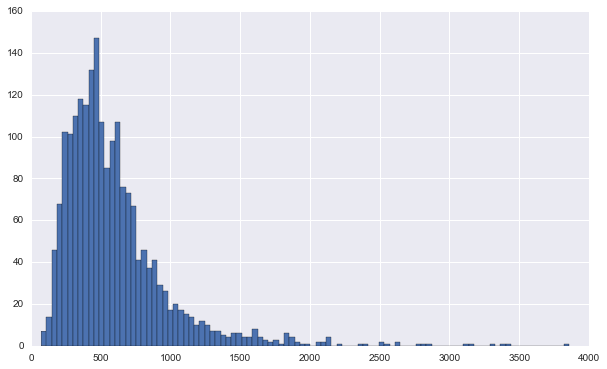

In [25]:
#1 bici con mas viajes
trips.loc[trips.bike_id == 392,:].loc[trips.duration <=4000]['duration'].hist(bins=100,figsize=(10,6));

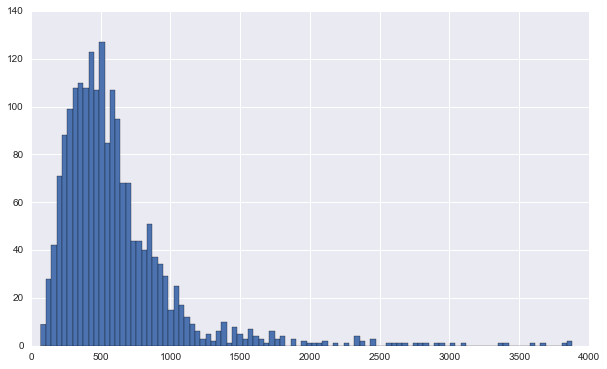

In [26]:
#2 bici con mas viajes
trips.loc[trips.bike_id == 489,:].loc[trips.duration <=4000]['duration'].hist(bins=100,figsize=(10,6));

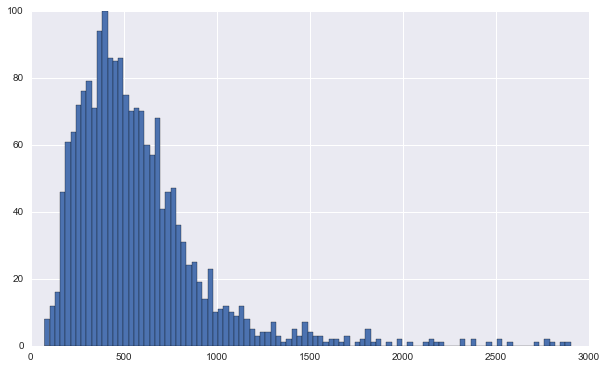

In [27]:
#3 bici con mas viajes, aca la tendencia ya no es 500seg, yo diria entre 
#400seg y 450seg
trips.loc[trips.bike_id == 558,:].loc[trips.duration <=3000]['duration'].hist(bins=100,figsize=(10,6));

In [29]:
trips['Month'] = trips['date_start'].map(lambda x: x.strftime('%B'))

In [30]:
trips['Month']

0            August
1            August
2            August
3            August
4            August
5            August
6            August
7            August
8            August
9            August
10           August
11           August
12           August
13           August
14           August
15           August
16           August
17           August
18           August
19           August
20           August
21           August
22           August
23           August
24           August
25           August
26           August
27           August
28           August
29           August
            ...    
669929    September
669930    September
669931    September
669932    September
669933    September
669934    September
669935    September
669936    September
669937    September
669938    September
669939    September
669940    September
669941    September
669942    September
669943    September
669944    September
669945    September
669946    September
669947    September


In [89]:
mesPor2013 = trips.loc[trips.start_date.str.contains('2013'),['Month']]
mesPor2013 = mesPor2013['Month'].value_counts()

In [90]:
mesPor2014 = trips.loc[trips.start_date.str.contains('2014'),['Month']]
mesPor2014 = mesPor2014['Month'].value_counts()

In [91]:
mesPor2015 = trips.loc[trips.start_date.str.contains('2015'),['Month']]
mesPor2015 = mesPor2015['Month'].value_counts()

In [92]:
mesPor2014 = mesPor2014\
    .reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
mesPor2014

January      24428
February     19024
March        24593
April        26221
May          28502
June         29982
July         31279
August       31215
September    31682
October      34220
November     25516
December     19677
Name: Month, dtype: int64

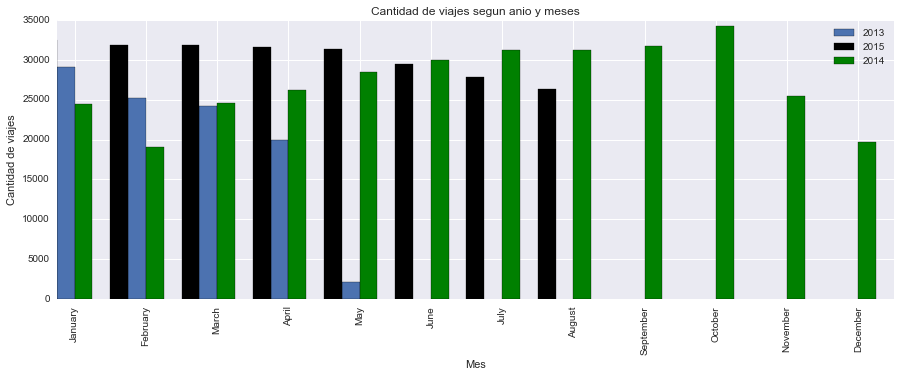

In [94]:
plt.figure()
plt.title('Cantidad de viajes segun anio y meses')
mesPor2013.plot('bar',position=1,width=0.25,label='2013')
mesPor2015.plot('bar',position=2,color='black',width=0.25,label='2015')
mesPor2014.plot('bar',position=0,color='green',width=0.25,label='2014',figsize=(15,5))
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')